<a href="https://colab.research.google.com/github/kragtenb/SelfDriving-RC-deep-learning/blob/main/OpenCVPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Transformations

## Task 1:

1. Load an image of your choice using cv2.imread().
Use cv2.resize() to resize the image to half its original size.
2. Select a region in the original image and create a cropped version.
3. Display the original, resized, and cropped images using cv2.imshow().

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
image_file = "/home/blake/SelfDriving-RC-deep-learning/TrainingData/Images/2024_03_25_T_11_08_55.jpg"
image = cv.imread(image_file)

# If your image is in BGR format (OpenCV default), convert it to RGB for matplotlib
# if image.shape[2] == 3:
#  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)


def display_image(image):
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.show()


# Display the image
plt.imshow(image)
plt.show()

In [ ]:
image_file = "/home/blake/SelfDriving-RC-deep-learning/TrainingData/Images/2024_03_25_T_11_05_58.jpg"
image = cv.imread(image_file)

# resize the image to half
image_height = int(image.shape[0] / 2)
image_width = int(image.shape[1] / 2)
resized = cv.resize(image, (image_width, image_height))

# Resize to half the original size
half_size_image = cv.resize(image, (0, 0), fx=2, fy=2)

# plt.imshow(resized)
plt.imshow(half_size_image)
plt.show()

In [ ]:
# Crop image

# Top left corner
cropped_image = image[: image.shape[0] // 4, : image.shape[1] // 4, :]

In [ ]:
display_image(cropped_image)

#Task 2:

1. Load another image.
2. Resize it to a specific resolution (e.g., 300x150). Pay attention to the interpolation parameter when resizing. Experiment with cv2.INTER_AREA and cv2.INTER_LINEAR to see the differences.

In [ ]:
resized_area = cv.resize(
    image, (image.shape[1] // 8, image.shape[0] // 8), interpolation=cv.INTER_AREA
)

plt.imshow(resized_area)
plt.show()

In [ ]:
resized_linear = cv.resize(
    image, (image.shape[1] // 8, image.shape[0] // 8), interpolation=cv.INTER_LINEAR
)

plt.imshow(resized_linear)
plt.show()

# Rotation & Flipping

## Task 3:

1. Use cv2.flip() to create flipped versions of an image, both horizontally and vertically. Experiment with different flipCode values.


In [ ]:
flip_0 = cv.flip(image, 0)
flip_1 = cv.flip(image, 1)
flip_neg_1 = cv.flip(image, -1)

plt.title("Flip Upside Down")
plt.imshow(flip_0)
plt.show()
plt.title("Flip left to right")
plt.imshow(flip_1)
plt.show()
plt.title("Flip both left to right and upsidedown")
plt.imshow(flip_neg_1)
plt.show()

# Task 4

1. Load an image.
2. Calculate a rotation matrix using cv2.getRotationMatrix2D() with a center point, an angle (say, 45 degrees), and a scaling factor.
3. Apply the rotation using cv2.warpAffine() and display the results.

In [ ]:
rotation_matrix = cv.getRotationMatrix2D(
    (image.shape[1] // 2, image.shape[0] // 2), 45, 1
)
rotated_image = cv.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.show()

# Color Conversion

## Task 5

1. Load a color image.
2. Convert it to grayscale using cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).
3. Display both the original and grayscale versions.

In [ ]:
grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.title("Greyscale")
display_image(grayscale_image)

# Exploring HSV

## Task 6

1. Convert the color image to the HSV color space using cv2.cvtColor(image, cv2.COLOR_BGR2HSV).

In [ ]:
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
plt.title("HSV Image BGR2HSV")
plt.imshow(hsv_image)
plt.show()

hsv_image = cv.cvtColor(cv.cvtColor(image, cv.COLOR_BGR2RGB), cv.COLOR_RGB2HSV)
plt.title("HSV Image RGB2HSV")
plt.imshow(hsv_image)
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a gradient test image
test_image = np.linspace(0, 255, 256).astype("uint8")
test_image = np.tile(test_image, (256, 1))

# Calculate gradients using Sobel filters
sobelx = cv2.Sobel(test_image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal gradients
sobely = cv2.Sobel(test_image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical gradients

# Calculate gradient magnitude
magnitude = np.sqrt(sobelx**2 + sobely**2)

# Visualize results
plt.figure(figsize=(10, 6))

plt.subplot(221), plt.imshow(test_image, cmap="gray"), plt.title("Original")
plt.subplot(222), plt.imshow(sobelx, cmap="gray"), plt.title("Sobel X")
plt.subplot(223), plt.imshow(sobely, cmap="gray"), plt.title("Sobel Y")
plt.subplot(224), plt.imshow(magnitude, cmap="gray"), plt.title("Gradient Magnitude")
plt.show()

# Practice Problems For Noise Reduction On Images Using OpenCV

## Problem 1: Noise Reduction Technique Selection

You're working with a grayscale image captured in low-light conditions. The image suffers from both Gaussian noise (random variations in pixel intensity) and occasional salt-and-pepper noise (random black and white pixels).

Which noise reduction technique would be most appropriate as an initial step? Explain your reasoning.
A) Gaussian Blurring
B) Median Blurring
C) Bilateral Filtering
Briefly discuss the pros and cons of using the other two techniques (options B and C) for this scenario.

In [ ]:
salt_n_pepper_image = cv.imread("Images/salt_n_pepper_noise.png")
display_image(salt_n_pepper_image)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
gaussian_blurred_image_3x3 = cv.GaussianBlur(salt_n_pepper_image, (3, 3), 0)
gaussian_blurred_image_5x5 = cv.GaussianBlur(salt_n_pepper_image, (5, 5), 0)
gaussian_blurred_image_7x7 = cv.GaussianBlur(salt_n_pepper_image, (7, 7), 0)
axes[0, 0].set_title("gaussian_blurred_image_3x3")
axes[0, 0].imshow(gaussian_blurred_image_3x3)
axes[0, 1].set_title("gaussian_blurred_image_5x5")
axes[0, 1].imshow(gaussian_blurred_image_5x5)
axes[1, 0].set_title("gaussian_blurred_image_7x7")
axes[1, 0].imshow(gaussian_blurred_image_7x7)

plt.tight_layout()
plt.show()

# Gaussian Blur
This would be used when there are a lot of high conflicting colors sporadically throughput the image. This is also an efficient blurring technique for computer resources. These can me different random colors and are usually associated with sensor or network malfunction or slowness. Guassian blur can help reduce this noise. Creating more continues edged colors and better edge defining.



In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
median_blurred_image_3x3 = cv.medianBlur(salt_n_pepper_image, 3)
median_blurred_image_5x5 = cv.medianBlur(salt_n_pepper_image, 5)
median_blurred_image_7x7 = cv.medianBlur(salt_n_pepper_image, 7)
axes[0, 0].set_title("median_blurred_image_3x3")
axes[0, 0].imshow(median_blurred_image_3x3)
axes[0, 1].set_title("median_blurred_image_5x5")
axes[0, 1].imshow(median_blurred_image_5x5)
axes[1, 0].set_title("median_blurred_image_7x7")
axes[1, 0].imshow(median_blurred_image_7x7)

plt.tight_layout()
plt.show()

# Median Blur

This will remove blacks and whites that a placed throughout the image. This should be used when this salt and pepper effect is seen. As seen in kernel 3, the image can be cleaned up while still keeping the edges sharp

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
bilateral_75 = cv.bilateralFilter(
    salt_n_pepper_image, d=9, sigmaColor=75, sigmaSpace=75
)
bilateral_75_d_25 = cv.bilateralFilter(
    salt_n_pepper_image, d=25, sigmaColor=75, sigmaSpace=75
)
bilateral_150 = cv.bilateralFilter(
    salt_n_pepper_image, d=9, sigmaColor=150, sigmaSpace=150
)
bilateral_35 = cv.bilateralFilter(
    salt_n_pepper_image, d=9, sigmaColor=35, sigmaSpace=35
)
bilateral_75_150 = cv.bilateralFilter(
    salt_n_pepper_image, d=9, sigmaColor=75, sigmaSpace=150
)
bilateral_150_75 = cv.bilateralFilter(
    salt_n_pepper_image, d=9, sigmaColor=150, sigmaSpace=75
)
axes[0, 0].set_title("bilateral_75")
axes[0, 0].imshow(bilateral_75)
axes[0, 1].set_title("bilateral_75_d_25")
axes[0, 1].imshow(bilateral_75_d_25)
axes[1, 0].set_title("bilateral_150")
axes[1, 0].imshow(bilateral_150)
axes[1, 1].set_title("bilateral_35")
axes[1, 1].imshow(bilateral_35)
axes[2, 0].set_title("bilateral_75_150")
axes[2, 0].imshow(bilateral_75_150)
axes[2, 1].set_title("bilateral_150_75")
axes[2, 1].imshow(bilateral_150_75)

plt.tight_layout()
plt.show()

# Answer
Median filter does the best here as guassian filter blurs the salt and pepper pixels.

Bilaterial doesn't do much to this image.

# Problem 2: Kernel Size Selection

You're tasked with denoising a high-resolution image containing a detailed architectural drawing. The drawing consists of fine lines and intricate details.

1. What factors would you consider when choosing a kernel size for Gaussian blurring?
2. Given your focus on preserving details, would you likely choose a smaller or larger kernel size? Why?


## Answer
The larger the kernel size, the less fine detail lines are retained. As seen in the code below. the 3x3 contails a lot of the small deals still but the 9x9 starts to make it harder to see those details. One example is the balcony on the middle left of the image. 3x3 you can still see the railing pillars while 9x9 you can't see the pillars at all really.

Preserving details would make me use a smaller kernel size.

In [ ]:
architecture_image = cv.imread("Images/architecture_drawing.png")
architecture_image = cv.cvtColor(architecture_image, cv.COLOR_BGR2RGB)
plt.imshow(architecture_image)
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
gaussian_blurred_arch_image_1 = cv.GaussianBlur(architecture_image, (1, 1), 0)
gaussian_blurred_arch_image_3 = cv.GaussianBlur(architecture_image, (3, 3), 0)
gaussian_blurred_arch_image_5 = cv.GaussianBlur(architecture_image, (5, 5), 0)
gaussian_blurred_arch_image_7 = cv.GaussianBlur(architecture_image, (7, 7), 0)
gaussian_blurred_arch_image_9 = cv.GaussianBlur(architecture_image, (9, 9), 0)
axes[0, 0].set_title("Original")
axes[0, 0].imshow(architecture_image)
axes[0, 1].set_title("1x1")
axes[0, 1].imshow(gaussian_blurred_arch_image_1)
axes[1, 0].set_title("3x3")
axes[1, 0].imshow(gaussian_blurred_arch_image_3)
axes[1, 1].set_title("5x5")
axes[1, 1].imshow(gaussian_blurred_arch_image_5)
axes[2, 0].set_title("7x7")
axes[2, 0].imshow(gaussian_blurred_arch_image_7)
axes[2, 1].set_title("9x9")
axes[2, 1].imshow(gaussian_blurred_arch_image_9)

plt.tight_layout
plt.show()

In [ ]:
rc_image = cv.imread("TrainingData/Images/2024_03_25_T_11_09_06.jpg")
rc_image = cv.cvtColor(rc_image, cv.COLOR_BGR2GRAY)

display_image(rc_image)

# Canny Edge Dection

## 1 Apply blurring to reduce noise of image

In [ ]:
blurred_rc_image = cv.GaussianBlur(rc_image, (9, 9), 0)

display_image(blurred_rc_image)

## 2. Apply gradiate intensity to applify edges

In [ ]:
# Calculate the gradients using Sobel filters
sobelx = cv2.Sobel(blurred_rc_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(blurred_rc_image, cv2.CV_64F, 0, 1, ksize=5)

# Define the Roberts kernels
kernel_x = np.array([[0, 1], [-1, 0]])
kernel_y = np.array([[1, 0], [0, -1]])

# Apply filtering. This remains the same as with Prewitt
roberts_x = cv2.filter2D(blurred_rc_image, -1, kernel_x)
roberts_y = cv2.filter2D(blurred_rc_image, -1, kernel_y)

# Define the Prewitt kernels (replace with Roberts kernels if desired)
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Apply filtering (similar to using cv2.Sobel)
prewitt_x = cv2.filter2D(blurred_rc_image, -1, kernel_x)
prewitt_y = cv2.filter2D(blurred_rc_image, -1, kernel_y)

# Optionally calculate the magnitude of the gradient
magnitude = np.sqrt(sobelx**2 + sobely**2)

# Visualize results
plt.figure(figsize=(10, 6))

plt.subplot(421), plt.imshow(blurred_rc_image, cmap="gray"), plt.title("Original")
plt.subplot(422), plt.imshow(sobelx, cmap="gray"), plt.title("Sobel X")
plt.subplot(423), plt.imshow(sobely, cmap="gray"), plt.title("Sobel Y")
plt.subplot(424), plt.imshow(roberts_x, cmap="gray"), plt.title("Roberts X")
plt.subplot(425), plt.imshow(roberts_y, cmap="gray"), plt.title("Roberts Y")
plt.subplot(426), plt.imshow(prewitt_x, cmap="gray"), plt.title("Prewitt X")
plt.subplot(427), plt.imshow(prewitt_y, cmap="gray"), plt.title("Prewitt Y")
plt.subplot(428), plt.imshow(magnitude, cmap="gray"), plt.title("Gradient Magnitude")
plt.show()

In [ ]:
canny_edges = cv.Canny(blurred_rc_image, 40, 80)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].set_title("Original")
axes[0].imshow(rc_image)

axes[1].set_title("Canny Edges")
axes[1].imshow(canny_edges)

plt.tight_layout()
plt.show()

# Feature Detection With OpenCV

# SIFT Scale-Invariant Feature Transform

1. Scale-Space Construction:

SIFT starts by creating a multi-scale representation of the image called a scale-space. This is achieved by applying a Gaussian filter at different scales (blurring with increasing kernel sizes) to the original image. This process aims to identify stable features that persist across various levels of detail.

2. Keypoint Detection:

Within the scale-space pyramid, SIFT searches for potential keypoints – locations in the image that are interesting and have a high likelihood of being unique. It does this by comparing a pixel's value with its neighbors at the current and adjacent scales. If a pixel is significantly brighter or darker than its surroundings across multiple scales, it's considered a potential keypoint candidate.

3. Keypoint Refinement:

Not all candidate keypoints are created equal. SIFT employs a process called keypoint localization to refine the initial detections and eliminate unstable ones. It uses a quadratic function to fit the neighboring pixel values around the candidate, determining the subpixel location with the most extreme value (maximum or minimum). This ensures precise keypoint localization.

4. Orientation Assignment:

Images can be rotated, and SIFT needs to account for that. It assigns an orientation to each keypoint to achieve invariance to image rotation. This involves calculating the image gradient (direction and magnitude) in a local neighborhood around the keypoint. A histogram of gradient orientations is then created, and the peak of the histogram is considered the dominant orientation for that keypoint.

5. Keypoint Descriptor:

Finally, SIFT generates a descriptor for each keypoint. This descriptor captures the keypoint's local image information in a way that is robust to scaling and rotation. It divides the keypoint's neighborhood into smaller subregions and calculates a histogram of gradient orientations within each subregion. This creates a unique "fingerprint" that represents the keypoint's surroundings.

Strengths of SIFT:

Robustness: SIFT is highly resistant to scaling, rotation, and illumination changes, making it a versatile tool for real-world applications.
Distinctive Features: SIFT descriptors are effective at capturing unique local image information, leading to reliable matching across different images.
Widely Used: SIFT is a well-established algorithm with extensive research and documentation, making it a popular choice in computer vision tasks.

Weaknesses of SIFT:

Computational Cost: Compared to faster alternatives like ORB, SIFT can be computationally expensive, especially for high-resolution images.
Not Perfect for Deformations: While robust to scaling and rotation, SIFT may struggle with significant image deformations (e.g., stretching).

Explanation of SIFT: https://www.youtube.com/watch?v=4AvTMVD9ig0

# Basic Example

In [ ]:
import os

images = []
images_path = "TrainingData/Images"
for im in os.listdir(images_path):
    if im.endswith(".jpg"):
        images.append(cv.imread(images_path + "/" + im))

images = np.array(images)

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


def display_sift(img):
    img_copy = img.copy()
    # Convert greyscale
    grey_img = cv.cvtColor(img_copy, cv.COLOR_BGR2GRAY)

    # Create a SIFT object
    sift = cv.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(grey_img, None)

    # Draw keypoints on the image
    img_copy = cv2.drawKeypoints(
        grey_img, keypoints, img_copy, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # print(descriptors.shape)
    # plt.imshow(img_copy)
    # plt.show()
    return keypoints, descriptors, img_copy


display_sift(images[0])

In [ ]:
display_sift(images[3])

# SURF (Speeded-Up Robust Features)
SURF (Speeded-Up Robust Features) is a computer vision algorithm designed for fast and robust feature detection and description. It takes inspiration from SIFT (Scale-Invariant Feature Transform) but aims to achieve similar performance with significantly less computational cost. This makes SURF a valuable choice for real-time applications where speed is a critical factor.

Here's a breakdown of the key steps involved in SURF:

1. Integral Images:

Unlike SIFT, which relies on Gaussian filtering at different scales, SURF leverages the concept of integral images. An integral image efficiently stores the sum of pixel intensities above any given location in the original image. This allows for rapid box filter computations at various scales, significantly speeding up feature detection.

2. Feature Detection:

SURF identifies potential keypoints using a Hessian matrix-based analysis. The Hessian matrix captures the local curvature of the image intensity at a specific location. Keypoints are identified at locations with significant curvature in both horizontal and vertical directions, indicating potential corner-like structures.

3. Keypoint Refinement:

Similar to SIFT, SURF refines the initially detected keypoints to ensure accuracy. It uses a quadratic function to fit the neighboring pixel values and determine the subpixel location with the most extreme response (maximum or minimum Laplacian value).

4. Orientation Assignment:

SURF assigns an orientation to each keypoint to achieve invariance to image rotation. It analyzes a circular neighborhood around the keypoint and calculates the summed Haar wavelet responses in different directions. The direction with the strongest response is considered the dominant orientation.

5. Keypoint Descriptor:

To create a descriptor, SURF divides the keypoint's neighborhood into a circular region with subregions. It then calculates the summed Haar wavelet responses in both horizontal and vertical directions within each subregion. These responses are then weighted based on their position and orientation relative to the keypoint center and dominant orientation.
Matching SURF Features:

Once you have SURF descriptors for keypoints in two images, the goal is to find corresponding keypoints between them. Similar to SIFT, this is achieved by comparing the descriptor vectors using a metric like Euclidean distance. The keypoints with the most similar descriptors are considered potential matches. Often, a ratio test is employed to ensure reliable matches (similar to SIFT).

## Strengths of SURF:

Speed: SURF is significantly faster than SIFT, making it suitable for real-time applications.
Robustness: While faster than SIFT, SURF still demonstrates good robustness to scaling, rotation, and illumination changes.
Simplicity: The underlying concepts of SURF are often considered simpler than SIFT, making it easier to understand and implement.

## Weaknesses of SURF:

Less Distinctive Descriptors: Compared to SIFT, SURF descriptors might be slightly less distinctive, potentially leading to a higher chance of incorrect matches under challenging conditions.
Less Viewpoint Invariance: SURF exhibits lower invariance to viewpoint changes (e.g., large perspective distortions) compared to SIFT.
When to Choose SURF:

If speed is a critical factor in your application, and you can tolerate a slight trade-off in descriptor distinctiveness, SURF is an excellent choice.
For tasks where real-time performance is essential, like object tracking or robot navigation, SURF's speed becomes a significant advantage.

# SURF is Patented so unable to use

In [ ]:
def display_orb(img):
    img_copy = img.copy()
    # Convert greyscale
    grey_img = cv.cvtColor(img_copy, cv.COLOR_BGR2GRAY)

    # Create a SIFT object
    orb = cv.ORB_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = orb.detectAndCompute(grey_img, None)

    # Draw keypoints on the image
    img_copy = cv.drawKeypoints(
        grey_img, keypoints, img_copy, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # print(descriptors.shape)
    # plt.imshow(img_copy)
    # plt.show()
    return keypoints, descriptors, img_copy


display_orb(images[0])
display_sift(images[0])

# Feature Matching Strategies

## Practice (Code & Visualization)

1. Setting the Scene:

Load two images.
Use your existing SIFT, SURF, or ORB functions to detect keypoints and calculate descriptors on both images.

2. Brute-Force Matching Implementation:

Use cv2.BFMatcher(), followed by the .match() or .knnMatch() function. Experiment with different distance norms for real-valued and binary descriptors.

3. FLANN-Based Matching Implementation:

Explore cv2.FlannBasedMatcher(), its index parameters and search parameters
Implement knnMatch() to get approximate nearest neighbor matches.

4. Visualization:

Use cv2.drawMatches() or cv2.drawMatchesKnn() to visualize the matching results. Analyze the differences between Brute-Force and FLANN results.

In [ ]:
img_1_keypts, img_1_desc, img_1 = display_sift(images[11])
img_2_keypts, img_2_desc, img_2 = display_sift(images[4])

img_1_orb_keypts, img_1_orb_desc, img_orb_1 = display_orb(images[11])
img_2_orb_keypts, img_2_orb_desc, img_orb_2 = display_orb(images[4])

# create BFMatcher Object

# NORM_HAMMING when using ORB
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(img_1_orb_desc, img_2_orb_desc)

# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x: x.distance)

In [ ]:
# Draw first 10 matches.
img3 = cv.drawMatches(
    images[11],
    img_1_orb_keypts,
    images[4],
    img_2_orb_keypts,
    matches[:10],
    None,
    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
)

display_image(img3)

In [ ]:
# SIFT matcher
bf = cv.BFMatcher()

matches = bf.knnMatch(img_1_desc, img_2_desc, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append([m])

sift_img3 = cv.drawMatchesKnn(
    images[11],
    img_1_keypts,
    images[4],
    img_2_keypts,
    good,
    None,
    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
)

display_image(sift_img3)

[[[   0.    0.]]

 [[   0. 1714.]]

 [[ 244. 1714.]]

 [[ 244.    0.]]]


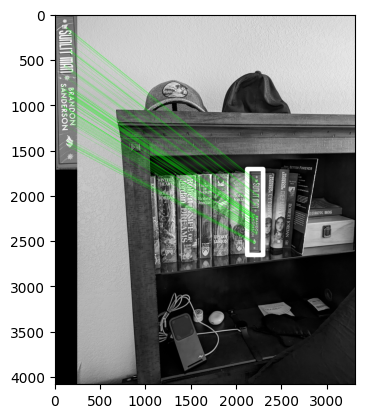

(<matplotlib.image.AxesImage at 0x7069381e5f00>, None)

In [ ]:
# FLANN

img1 = cv.imread("Images/bookbinding.png")
img2 = cv.imread("Images/PXL_20240406_214800868.jpg")

kpts, desc, sift = display_sift(img1)
kpts2, desc2, sift2 = display_sift(img2)

img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

MIN_MATCH_COUNT = 10

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(desc, desc2, k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)

if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([kpts[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kpts2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    h, w = img1.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    print(pts)
    dst = cv.perspectiveTransform(pts, M)

    x_min = int(np.min(dst[:, :, 0]))
    x_max = int(np.max(dst[:, :, 0]))
    y_min = int(np.min(dst[:, :, 1]))
    y_max = int(np.max(dst[:, :, 1]))

    img2 = cv2.rectangle(
        img2, (x_min, y_min), (x_max, y_max), color=(255, 255, 255), thickness=50
    )

    # img2 = cv.polylines(img2,[np.int32(dst)],True,255,10, cv.LINE_AA)

else:
    print("Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT))
    matchesMask = None

draw_params = dict(
    matchColor=(0, 255, 0),  # draw matches in green color
    singlePointColor=None,
    matchesMask=matchesMask,  # draw only inliers
    flags=2,
)

img3 = cv.drawMatches(img1, kpts, img2, kpts2, good, None, **draw_params)

# cv.imwrite("img1.jpg", img1)
# cv.imwrite("img2.jpg", img2)
# cv.imwrite("img3.jpg", img3)

plt.imshow(img3, "gray"), plt.show()

# Quick side note when looking at OpenCV tutorials
## Measuring performance

In [ ]:
e1 = cv.getTickCount()
# your code execution
e2 = cv.getTickCount()
time = (e2 - e1) / cv.getTickFrequency()
print(time)

1.159e-05


In [ ]:
cv.useOptimized()

True

In [ ]:
img = images[4].copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv.cornerHarris(gray, 2, 3, 0.04)

# result is dilated for marking the corners, not important
dst = cv.dilate(dst, None)


# # Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.05 * dst.max()] = [0, 0, 255]

display_image(img)

In [ ]:
img = images[4].copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray, 50, 0.01, 5)

corners = np.intp(corners)

for i in corners:
    x, y = i.ravel()
    cv.circle(img, (x, y), 3, 255, -1)

plt.imshow(img), plt.show()

# Object detection learning path

## Object Detection: The Next Frontier

Object detection expands upon your existing skills, allowing you to locate and identify specific objects within an image or video. It has vast applications in robotics, self-driving cars, image search, and much more.

## Approaches

Let's outline some common object detection approaches to guide your learning:

1. Traditional Techniques

* Sliding Window and Feature Classification: Before the deep learning era, methods involved moving a window over the image and using feature descriptors (e.g., HOG) + classifiers (e.g., SVM) to detect objects within each window.
* Pros: Good foundation for understanding object detection principles.
* Cons: Often computationally slower and can be less accurate compared to modern methods.

2. Deep Learning-based

* Region-based CNNs (R-CNN, Fast R-CNN, Faster R-CNN): These models propose regions of interest in the image and then classify objects within those regions.
* Single-Shot Detectors (YOLO, SSD): Perform detection and classification in a single pass through a neural network, prioritizing speed.
* Pros: State-of-the-art accuracy and, in some cases, real-time performance.
* Cons: Require understanding of neural network architectures and training.

## Learning Plan:

Here's a possible learning path:

1. HOG (Histogram of Oriented Gradients): Understand how HOG features summarize gradient information within image patches, often used with SVM classifiers for detection.
2. Sliding Window and SVM: Experiment with a basic sliding window approach for object detection (like a book or specific logo).
3. Deep Learning Introduction
* If new to deep learning: Take a detour into introductory courses or tutorials on neural networks, convolutional neural networks (CNNs), and essential libraries like PyTorch or TensorFlow.
* If familiar with basics: Dive into pre-trained models available in PyTorch or TensorFlow for object detection (they provide great starting points).
4. Choose a Deep Object Detector: Explore architectures like YOLO or SSD based on your preference for speed vs. accuracy trade-offs.

## Project Ideas (To Consolidate Learning)

* Real-Time Object Tracker: Combine feature detection with object detection to track a specific object across video frames.
* Custom Object Detector: Fine-tune a pre-trained model to detect a unique object not found in standard datasets.
* Image Classification vs. Object Detection: Experiment with building both a classifier and a detector and explore when each is more suitable.


In [ ]:
# Create a HOGDescriptor object with parameters
hog = cv.HOGDescriptor((64, 64), (16, 16), (8, 8), (8, 8), 9)

# Calculate HOG descriptors
descriptors = hog.compute(images[0])
print(descriptors.shape)

(6824916,)


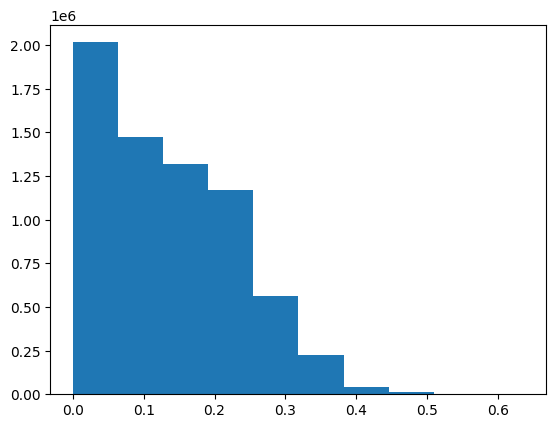

In [ ]:
plt.hist(descriptors)
plt.show()

# Making a small project to detect license plates using HOG

## Workflow Outline

1. Data Preparation:

* Positive Images: Gather images that contain the object you want to detect (e.g., numerous images of a book).
* Negative Images: Collect images that do not contain your target object (these will represent background or other objects).

2. HOG Feature Calculation:

* Iterate over your positive and negative images, calculating HOG descriptors for each.
* Important: Ensure your HOG parameters are well-suited to capturing the characteristics of your object.

3. Labels: Create labels corresponding to each HOG descriptor:

* Positive examples get a label of 1
* Negative examples get a label of 0 (or -1 depending on SVM library conventions).

4. SVM Training:

* Choose an SVM implementation (OpenCV or scikit-learn).
* Train your SVM classifier using the HOG features as input and the corresponding labels.

5. Sliding Window Detection:

* On a new image, use a sliding window of the same size as your training images.
* At each window position, calculate the HOG descriptor.
* Feed this descriptor to your SVM classifier.
* If the SVM predicts the 'positive' class, draw a bounding box at that window's location.

In [ ]:
# Collect images of license plates and negative images of cars without license plates

# Collect images and resize so they are all the same.
image_dir = "Images/"

lps = []
neg_lps = []
test_image = None
for fname in os.listdir(image_dir):
    image = cv.resize(cv.imread(image_dir + fname), dsize=(640, 480))
    if fname.startswith("LP"):
        lps.append(image)
    elif fname.startswith("neg"):
        neg_lps.append(image)
    elif fname == "car_with_license_plate.jpg":
        test_image = image

lps = np.array(lps)
neg_lps = np.array(neg_lps)

In [ ]:
# 2 Calculate HOG features
window_size = (64, 128)
block_size = (16, 16)
block_stride = (8, 8)
cell_size = (8, 8)
nbins = 9
# Create a HOGDescriptor object with parameters
hog = cv.HOGDescriptor(window_size, block_size, block_stride, cell_size, nbins)

lps_desc = []
for x in lps:
    x = cv.cvtColor(x, cv.COLOR_BGR2GRAY)
    lps_desc.append(hog.compute(x))

neg_desc = []
for x in neg_lps:
    x = cv.cvtColor(x, cv.COLOR_BGR2GRAY)
    neg_desc.append(hog.compute(x))

all_desc = np.vstack(lps_desc + neg_desc)
labels = np.array([1, 1, 1, 0, 0, 0])

test_image_grey = cv.cvtColor(test_image, cv.COLOR_BGR2GRAY)

test_image_desc = hog.compute(test_image_grey)

In [ ]:
# 4 training
from sklearn import svm

svm_model = svm.SVC(kernel="linear")
svm_model.fit(all_desc, labels)

SVC(kernel='linear')

In [ ]:
def sliding_window(image, window_size, step_size):
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
            yield (x, y, image[y : y + window_size[1], x : x + window_size[0]])


detections = []
DECISION_THRESHOLD = 0.6

for x, y, window in sliding_window(test_image_grey, window_size, 10):
    if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
        continue
    # window = cv.cvtColor(window, cv.COLOR_BGR2GRAY)
    hog_descriptor = hog.compute(window)
    hog_descriptor = hog_descriptor.reshape(1, -1)
    prediction = svm_model.predict(hog_descriptor)
    if prediction == 1:
        conf_score = svm_model.decision_function(hog_descriptor)
        if conf_score > DECISION_THRESHOLD:
            print("Detection:: Location -> ({}, {})".format(x, y))
            print("Confidence Score {} \n".format(conf_score))
            # create a list of all the predictions found
            detections.append(
                (int(x), int(y), conf_score, int(windowSize[0]), int(windowSize[1]))
            )

for x_tl, y_tl, _, w, h in detections:
    cv2.rectangle(
        test_image_grey, (x_tl, y_tl), (x_tl + w, y_tl + h), (255, 0, 0), thickness=5
    )

rects = np.array(
    [[x, y, x + w, y + h] for (x, y, _, w, h) in detections]
)  # do nms on the detected bounding boxes
sc = [score[0] for (x, y, score, w, h) in detections]
print("detection confidence score: ", sc)
# sc = np.array(sc)
# pick = non_max_suppression(rects, probs = sc, overlapThresh = 0.3)

# Inspect this code to understand the next part